<a href="https://colab.research.google.com/github/rridss/application_of_ml_-in-industries/blob/main/EXP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
data = pd.read_csv('/content/city_hour (2).csv')
data.describe()



,Year,Quarter,Month,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,102958.000000,102958.000000,102958.000000,74619.000000,49155.000000,78952.000000,80236.000000,75744.000000,50508.000000,75734.000000,73997.000000,74219.000000,72319.000000,73886.000000,77279.000000
mean,2017.271557,2.517162,6.558432,55.982765,104.411891,15.941915,36.718677,34.460525,16.307900,9.393355,24.852875,31.895977,4.557328,13.420611,243.804009
std,1.427239,1.107213,3.414258,51.187574,73.419535,30.583145,45.000474,40.532417,15.666156,29.498089,36.836229,30.598052,11.805444,29.042043,335.103402
min,2015.000000,1.000000,1.000000,0.010000,0.200000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.020000,0.000000,0.000000,10.000000
25%,2016.000000,2.000000,4.000000,26.360000,55.255000,3.520000,11.170000,12.040000,7.790000,0.420000,4.200000,11.200000,0.230000,0.890000,81.000000
50%,2018.000000,3.000000,7.000000,44.440000,90.530000,8.410000,20.010000,22.340000,12.330000,0.980000,9.200000,21.890000,2.110000,2.430000,139.000000
75%,2019.000000,3.000000,9.000000,70.805000,134.565000,15.480000,43.120000,40.340000,20.050000,7.130000,26.060000,42.150000,4.440000,15.747500,273.000000
max,2019.000000,4.000000,12.000000,999.990000,999.990000,498.570000,499.510000,498.610000,433.470000,498.570000,199.960000,199.940000,381.580000,499.400000,3133.000000


In [ ]:
data = data.dropna()
data.describe()


,Year,Quarter,Month,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000,25896.000000
mean,2018.022050,2.558001,6.710187,51.663118,105.203820,11.853476,25.512861,27.333357,15.527217,0.799588,10.862242,32.290780,2.375209,2.876716,122.481928
std,1.139581,1.212965,3.809298,42.114316,72.882002,18.269582,23.572421,27.717939,14.202102,0.922317,12.693137,26.826537,6.239427,5.287848,72.217536
min,2015.000000,1.000000,1.000000,0.200000,0.390000,0.030000,0.100000,0.000000,0.010000,0.000000,0.010000,0.030000,0.000000,0.000000,21.000000
25%,2018.000000,1.000000,3.000000,23.000000,52.707500,2.450000,10.010000,10.507500,8.200000,0.380000,4.780000,14.357500,0.100000,0.600000,70.000000
50%,2018.000000,3.000000,7.000000,41.500000,89.000000,6.300000,16.870000,19.785000,12.860000,0.620000,7.870000,24.500000,0.680000,1.550000,104.000000
75%,2019.000000,4.000000,11.000000,69.000000,138.032500,13.500000,32.150000,32.102500,18.582500,0.950000,12.900000,42.050000,2.940000,3.250000,149.000000
max,2019.000000,4.000000,12.000000,999.990000,999.990000,303.500000,264.110000,392.860000,374.960000,25.450000,195.000000,199.940000,310.580000,305.300000,514.000000


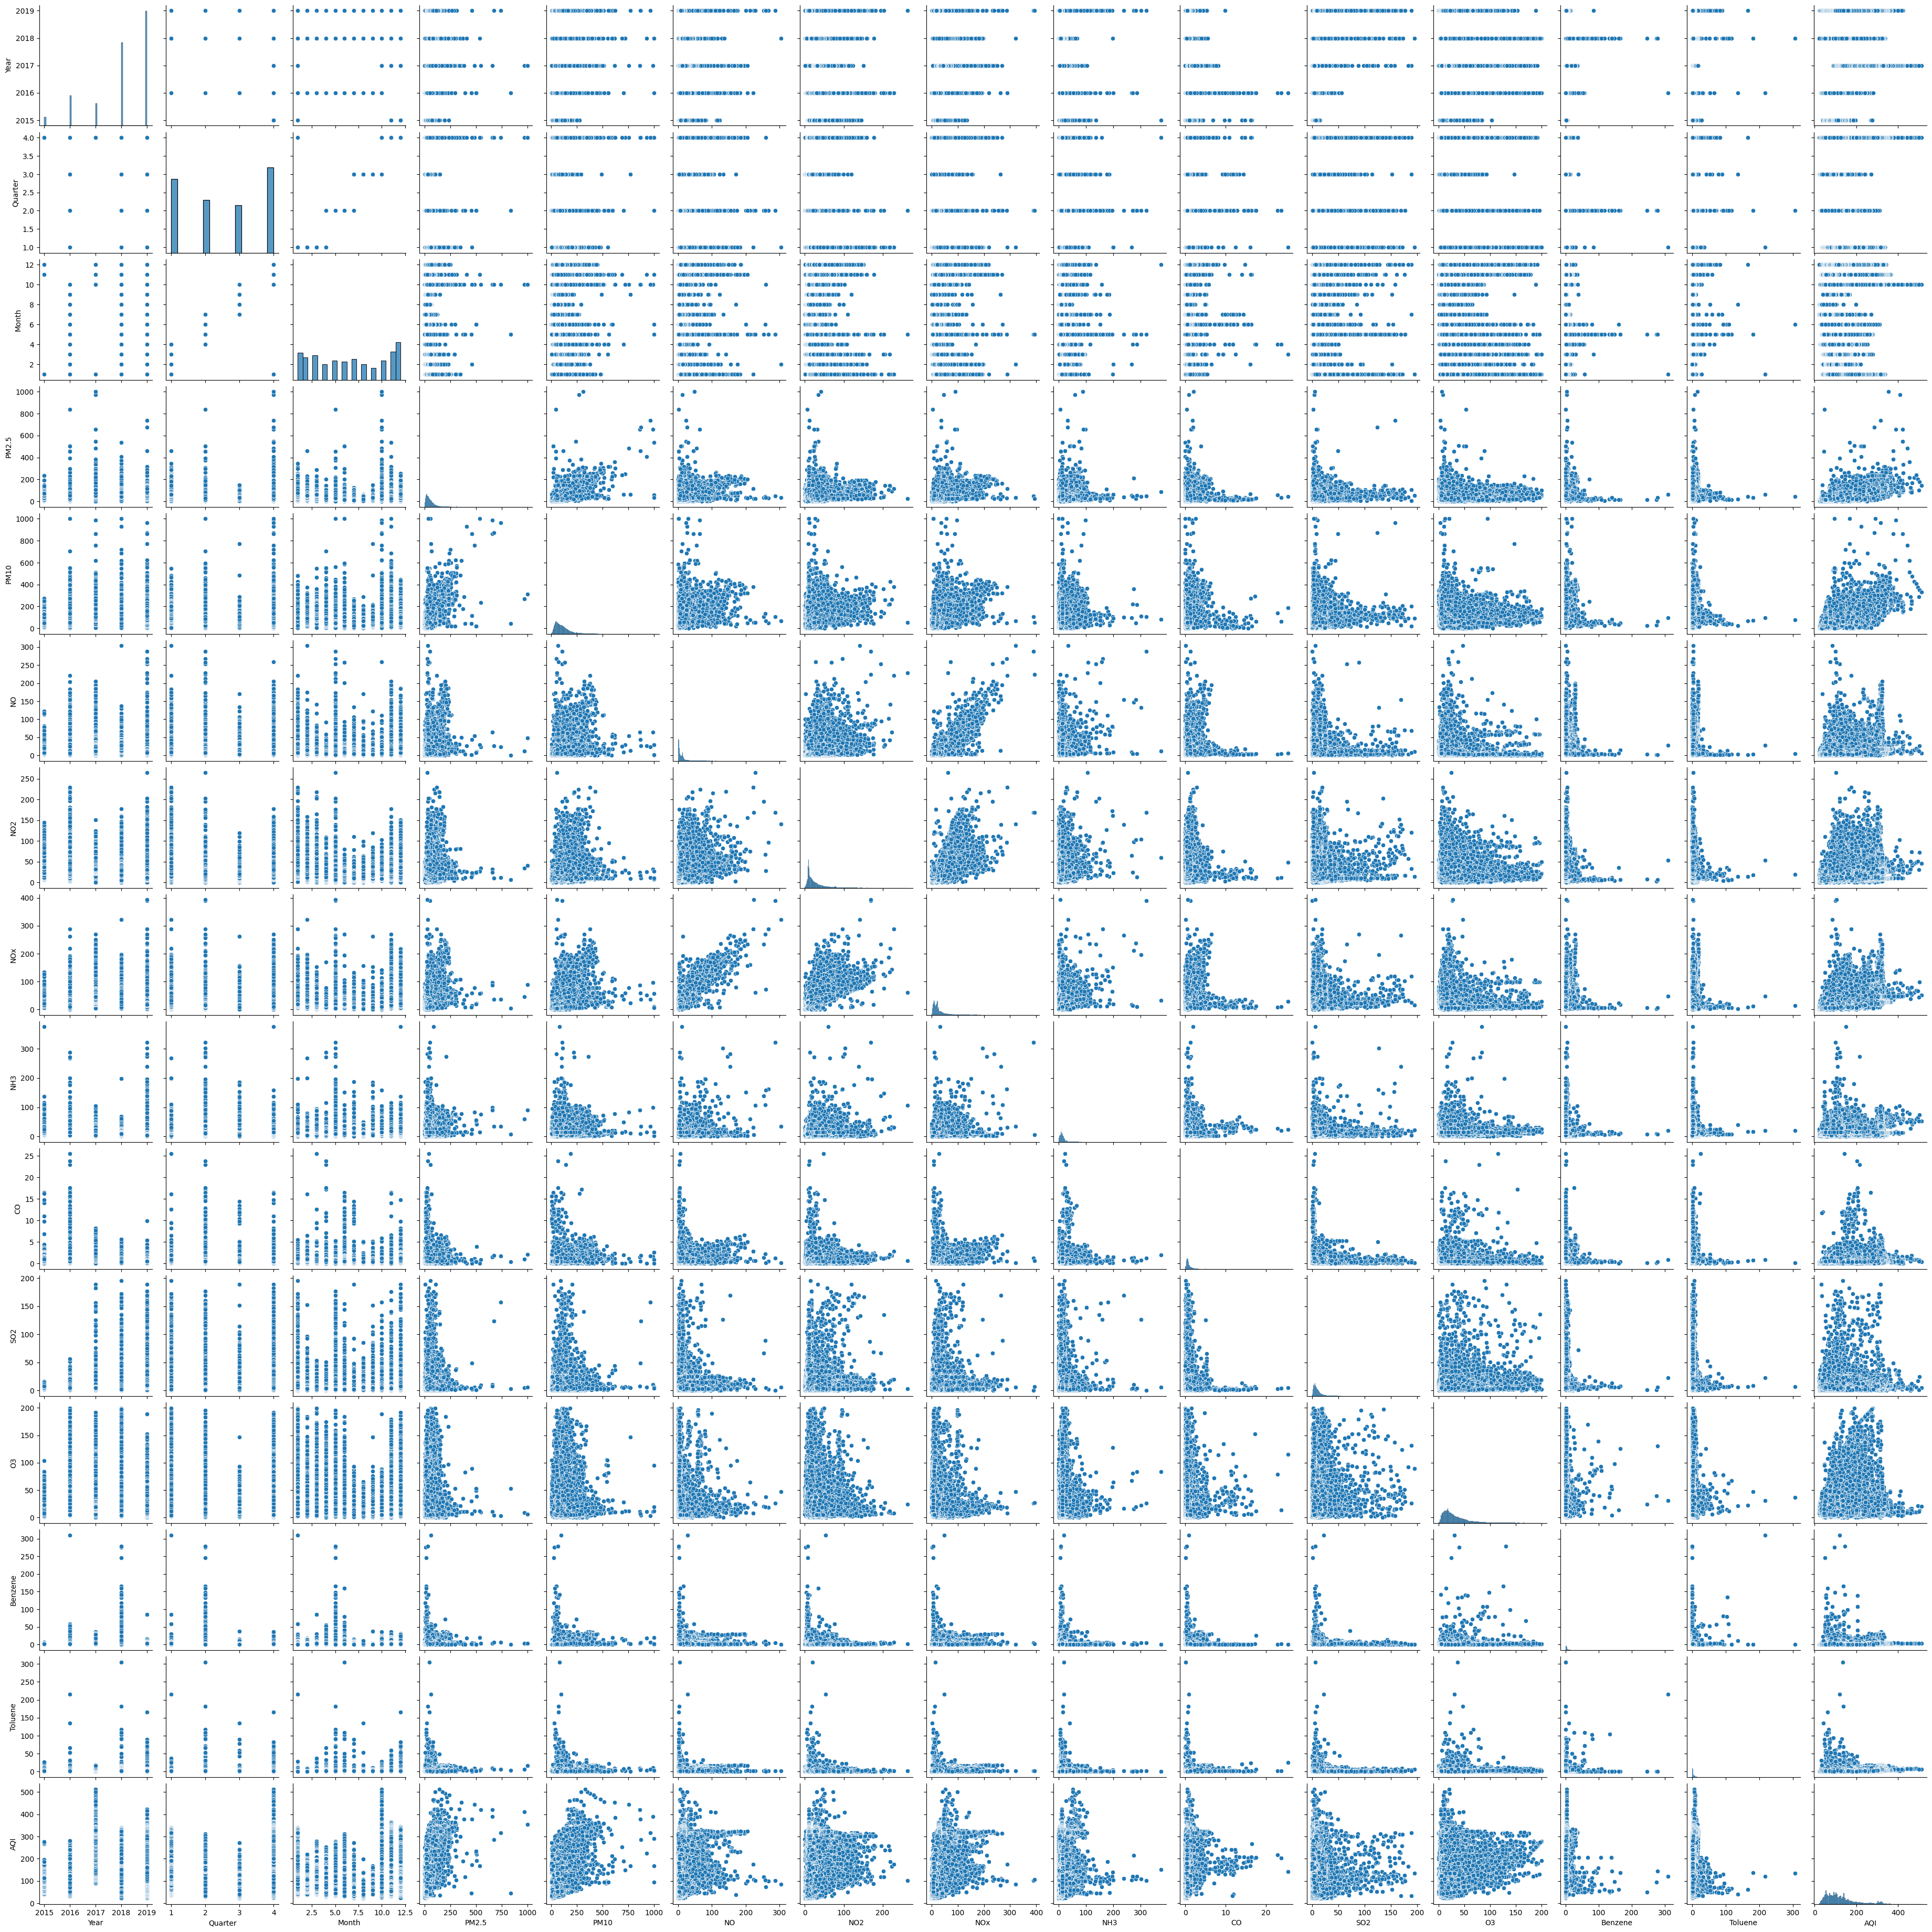

In [ ]:
sns.pairplot(data)
plt.show()

Mean Squared Error: 3614.30889754611
Mean Absolute Error: 43.548265430226145
R-squared: 0.2955714493318834


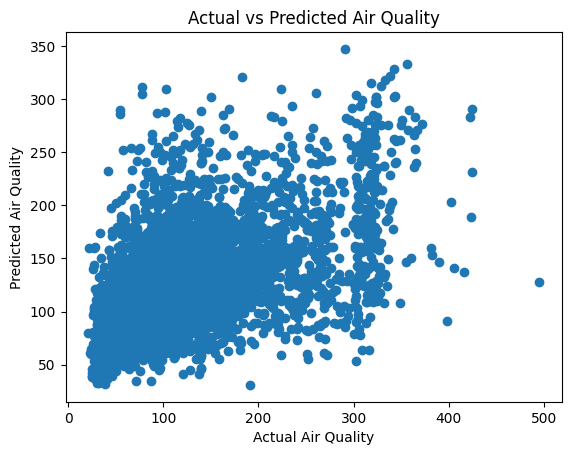

In [ ]:
X = data[['CO', 'SO2', 'NH3']] # Features
y = data['AQI'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
RandomForestRegressor()
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Air Quality")
plt.ylabel("Predicted Air Quality")
plt.title("Actual vs Predicted Air Quality")
plt.show()


Feature Importances:
[('CO', 0.32347435534237956), ('SO2', 0.285933698709966), ('NH3', 0.3905919459476545)]


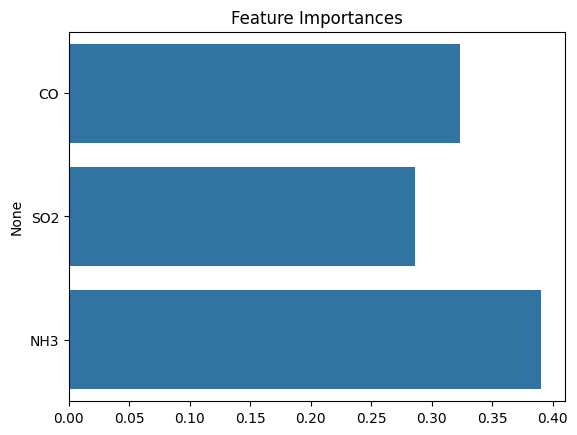

In [ ]:
feature_importances = model.feature_importances_
print("Feature Importances:")
print(list(zip(X.columns, feature_importances)))
[('CO', 0.4485906498476262), ('SO2', 0.18339103272302587), ('NH3', 0.36801831742934793)]
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importances")
plt.show()